<a href="https://colab.research.google.com/github/Owenp25/Top-5-Football-Leagues-Clustering-Analysis/blob/main/Top_5_Football_Leagues_Clustering_Teams_by_Passing_Play_Style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Top 5 Leagues: Clustering Teams by Passing Play Style**

For this project my goal is to cluster teams in the top 5 leagues by their passing, goal & shot creation, pass types, possession, and defensive stats to determine teams that are similar in playing style. My initial plan is to do this with a combination of the aforementioned stats to best represent the team’s overall play style: this includes type of ball progression from defense to attack, tempo of play, and most prominent type of shot creation. I plan on using K-means clustering in python to do this. Often in the soccer world we classify teams on a scale somewhere between controlling possession and direct counter attack. I think this project is useful because it can show how these play styles can be quantified and how distinct the groups of tactical approaches are. If there are more distinct clusters, then it is evident that certain general patterns of play are effective across all of Europe’s best leagues. If there is more of a sliding scale of play styles, then we will have insight into how important individual managers’ philosophies are. Looking at contemporary literature, “K-means cluster analysis was also used by Gollan, Ferrar, and Norton [36] to recognize playing styles. Three game style clusters were identified: (1) moderately favoring established defense, (2) dominant in transition offense and transition defense, and (3) strong in established offense and set pieces. The disadvantage of this method is that it does neither recognize playing styles, nor is it capable of quantifying them; instead, it categorizes the teams based on the phases in which they excel” (Plakias S et al.,  Identifying Soccer Teams’ Styles of Play: A Scoping and Critical Review.) After reading this I still want to proceed with K-means clustering, but I will keep in mind the known downsides. I think my next step would be to use factor analysis to work backwards from individual statistics in an effort to see what overarching play styles there are.

References

Plakias S, Moustakidis S, Kokkotis C, Tsatalas T, Papalexi M, Plakias D, Giakas G, Tsaopoulos D. Identifying Soccer Teams’ Styles of Play: A Scoping and Critical Review. Journal of Functional Morphology and Kinesiology. 2023; 8(2):39. https://doi.org/10.3390/jfmk8020039



# **Scraping Data**

In [1]:
# My first step is scraping data from FBref using code courtesy of this article by Paul Corcoran: https://levelup.gitconnected.com/quickly-and-easily-scrape-fbref-using-just-pandas-773b294f86a0

In [2]:
import pandas as pd

# read in standard data for top 5 leagues
top5_std = pd.read_html('https://fbref.com/en/comps/Big5/stats/squads/Big-5-European-Leagues-Stats')

# read in shooting data for top 5 leagues
top5_shooting = pd.read_html('https://fbref.com/en/comps/Big5/shooting/squads/Big-5-European-Leagues-Stats')

# read in goalkeeping data for top5 leagues
top5_goalkeeping = pd.read_html('https://fbref.com/en/comps/Big5/keepers/squads/Big-5-European-Leagues-Stats')

# read in advanced goalkeeping data for top 5 leagues
top5_advgoalkeeping = pd.read_html('https://fbref.com/en/comps/Big5/keepersadv/squads/Big-5-European-Leagues-Stats')

# read in passing data for top5 leagues
top5_passing = pd.read_html('https://fbref.com/en/comps/Big5/passing/squads/Big-5-European-Leagues-Stats')

# read in passing type data for top 5 leagues
top5_passtypes = pd.read_html('https://fbref.com/en/comps/Big5/passing_types/squads/Big-5-European-Leagues-Stats')

# read in goal creation data for top 5 leagues
top5_gca = pd.read_html('https://fbref.com/en/comps/Big5/gca/squads/Big-5-European-Leagues-Stats')

# read in defensive data for top 5 leagues
top5_def = pd.read_html('https://fbref.com/en/comps/Big5/defense/squads/Big-5-European-Leagues-Stats')

# read in possession data for top 5 leagues
top5_poss = pd.read_html('https://fbref.com/en/comps/Big5/possession/squads/Big-5-European-Leagues-Stats')

# read in misc data for top5 leagues
top5_misc = pd.read_html('https://fbref.com/en/comps/Big5/misc/squads/Big-5-European-Leagues-Stats')



In [3]:
# clean up formatting of each table's df, then save as dataframe

for idx,table in enumerate(top5_std):
 print('***************************')
 print(idx)
 print(table)
t5_std = top5_std[0]

for idx,table in enumerate(top5_shooting):
 print('***************************')
 print(idx)
 print(table)
t5_shooting = top5_shooting[0]

for idx,table in enumerate(top5_goalkeeping):
 print('***************************')
 print(idx)
 print(table)
t5_keepers = top5_goalkeeping[0]

for idx,table in enumerate(top5_advgoalkeeping):
 print('***************************')
 print(idx)
 print(table)
t5_advkeepers = top5_advgoalkeeping[0]

for idx,table in enumerate(top5_passing):
 print('***************************')
 print(idx)
 print(table)
t5_passing = top5_passing[0]

for idx,table in enumerate(top5_passtypes):
 print('***************************')
 print(idx)
 print(table)
t5_passtypes = top5_passtypes[0]

for idx,table in enumerate(top5_gca):
 print('***************************')
 print(idx)
 print(table)
t5_gca = top5_gca[0]

for idx,table in enumerate(top5_def):
 print('***************************')
 print(idx)
 print(table)
t5_def = top5_def[0]

for idx,table in enumerate(top5_poss):
 print('***************************')
 print(idx)
 print(table)
t5_poss = top5_poss[0]

for idx,table in enumerate(top5_misc):
 print('***************************')
 print(idx)
 print(table)
t5_misc = top5_misc[0]




***************************
0
   Unnamed: 0_level_0 Unnamed: 1_level_0  Unnamed: 2_level_0  \
                   Rk              Squad                Comp   
0                   1            Ajaccio          fr Ligue 1   
1                   2            Almería          es La Liga   
2                   3             Angers          fr Ligue 1   
3                   4            Arsenal  eng Premier League   
4                   5        Aston Villa  eng Premier League   
..                ...                ...                 ...   
93                 94         Villarreal          es La Liga   
94                 95      Werder Bremen       de Bundesliga   
95                 96           West Ham  eng Premier League   
96                 97          Wolfsburg       de Bundesliga   
97                 98             Wolves  eng Premier League   

   Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0 Playing Time  \
                 # Pl                Age               Poss  

In [4]:
# now I have the individual tables of each group of team statistics. I will now merge these so that I have one big data set with each row containing
# all necessary statistics for a unique team

In [5]:
# remove overarching multi index level, just want to keep column specific names
# t5_std = t5_std.droplevel(0, axis = 1)
# t5_shooting = t5_shooting.droplevel(0, axis = 1)
# t5_advkeepers = t5_advkeepers.droplevel(0, axis = 1)
# t5_keepers = t5_keepers.droplevel(0, axis = 1)
# t5_passing = t5_passing.droplevel(0, axis = 1)
# t5_passtypes = t5_passtypes.droplevel(0, axis = 1)
# t5_gca = t5_gca.droplevel(0, axis = 1)
# t5_def = t5_def.droplevel(0, axis = 1)
# t5_poss = t5_poss.droplevel(0, axis = 1)
# t5_misc = t5_misc.droplevel(0, axis = 1)

# **Cleaning and Formatting the Data**

Slice passing data set and do EDA from overall data set

In [6]:
t5_passing.columns

MultiIndex([( 'Unnamed: 0_level_0',      'Rk'),
            ( 'Unnamed: 1_level_0',   'Squad'),
            ( 'Unnamed: 2_level_0',    'Comp'),
            ( 'Unnamed: 3_level_0',    '# Pl'),
            ( 'Unnamed: 4_level_0',     '90s'),
            (              'Total',     'Cmp'),
            (              'Total',     'Att'),
            (              'Total',    'Cmp%'),
            (              'Total', 'TotDist'),
            (              'Total', 'PrgDist'),
            (              'Short',     'Cmp'),
            (              'Short',     'Att'),
            (              'Short',    'Cmp%'),
            (             'Medium',     'Cmp'),
            (             'Medium',     'Att'),
            (             'Medium',    'Cmp%'),
            (               'Long',     'Cmp'),
            (               'Long',     'Att'),
            (               'Long',    'Cmp%'),
            ('Unnamed: 19_level_0',     'Ast'),
            ('Unnamed: 20_level_0',     

In [7]:
# correct format

new_columns = {
    ('Unnamed: 0_level_0', 'Rk'): ('Unnamed: 0_level_0', 'Rank'),
    ('Unnamed: 1_level_0', 'Squad'): ('Unnamed: 1_level_0', 'Squad'),
    ('Unnamed: 2_level_0', 'Comp'): ('Unnamed: 2_level_0', 'Competition'),
    ('Unnamed: 3_level_0', '# Pl'): ('Unnamed: 3_level_0', 'Num Players'),
    ('Unnamed: 4_level_0', '90s'): ('Unnamed: 4_level_0', 'Games'),
    (              'Total',     'Cmp'): (              'Total',     'Cmp_total'),
    (              'Total',     'Att'): (              'Total',     'Att_total'),
    (              'Total',    'Cmp%'): (              'Total',    'Cmp%_total'),
    (              'Total', 'TotDist'): (              'Total', 'Tot_Dist'),
    (              'Total', 'PrgDist'): (              'Total', 'Prg_Dist'),
    (              'Short',     'Cmp'): (              'Short',     'Cmp_short'),
    (              'Short',     'Att'): (              'Short',     'Att_short'),
    (              'Short',    'Cmp%'): (              'Short',    'Cmp%_short'),
    (             'Medium',     'Cmp'): (             'Medium',     'Cmp_med'),
    (             'Medium',     'Att'): (             'Medium',     'Att_med'),
    (             'Medium',    'Cmp%'): (             'Medium',    'Cmp%_med'),
    (               'Long',     'Cmp'): (               'Long',     'Cmp_long'),
    (               'Long',     'Att'): (               'Long',     'Att_long'),
    (               'Long',    'Cmp%'): (               'Long',    'Cmp%_long'),
    ('Unnamed: 19_level_0',     'Ast'): ('Unnamed: 19_level_0',     'Assists'),
    ('Unnamed: 20_level_0',     'xAG'): ('Unnamed: 20_level_0',     'x_AG'),
    ('Unnamed: 21_level_0',      'xA'): ('Unnamed: 21_level_0',      'x_A'),
    ('Unnamed: 22_level_0',   'A-xAG'): ('Unnamed: 22_level_0',   'A-x_AG'),
    ('Unnamed: 23_level_0',      'KP'): ('Unnamed: 23_level_0',      'K_P'),
    ('Unnamed: 24_level_0',     '1/3'): ('Unnamed: 24_level_0',     'Final Third'),
    ('Unnamed: 25_level_0',     'PPA'): ('Unnamed: 25_level_0',     'PPa'),
    ('Unnamed: 26_level_0',   'CrsPA'): ('Unnamed: 26_level_0',   'Crs_PA'),
    ('Unnamed: 27_level_0',    'PrgP'): ('Unnamed: 27_level_0',    'Prg_P')
}


In [8]:
top5_passing = pd.DataFrame(t5_passing.values, columns=new_columns.values())

print(top5_passing.columns)

MultiIndex([( 'Unnamed: 0_level_0',        'Rank'),
            ( 'Unnamed: 1_level_0',       'Squad'),
            ( 'Unnamed: 2_level_0', 'Competition'),
            ( 'Unnamed: 3_level_0', 'Num Players'),
            ( 'Unnamed: 4_level_0',       'Games'),
            (              'Total',   'Cmp_total'),
            (              'Total',   'Att_total'),
            (              'Total',  'Cmp%_total'),
            (              'Total',    'Tot_Dist'),
            (              'Total',    'Prg_Dist'),
            (              'Short',   'Cmp_short'),
            (              'Short',   'Att_short'),
            (              'Short',  'Cmp%_short'),
            (             'Medium',     'Cmp_med'),
            (             'Medium',     'Att_med'),
            (             'Medium',    'Cmp%_med'),
            (               'Long',    'Cmp_long'),
            (               'Long',    'Att_long'),
            (               'Long',   'Cmp%_long'),
            

In [9]:
top5_passing

Unnamed: 0_level_0 Unnamed: 1_level_0  Unnamed: 2_level_0  \
                 Rank              Squad         Competition   
0                   1            Ajaccio          fr Ligue 1   
1                   2            Almería          es La Liga   
2                   3             Angers          fr Ligue 1   
3                   4            Arsenal  eng Premier League   
4                   5        Aston Villa  eng Premier League   
..                ...                ...                 ...   
93                 94         Villarreal          es La Liga   
94                 95      Werder Bremen       de Bundesliga   
95                 96           West Ham  eng Premier League   
96                 97          Wolfsburg       de Bundesliga   
97                 98             Wolves  eng Premier League   

   Unnamed: 3_level_0 Unnamed: 4_level_0     Total                       \
          Num Players              Games Cmp_total Att_total Cmp%_total   
0                  36               38.0     11216     15286       73.4   
1                  29               38.0     12151     15855       76.6   
2                  33               38.0     14103     17463       80.8   
3                  26               38.0     18281     21969       83.2   
4                  26               38.0     13782     17396       79.2   
..                ...                ...       ...       ...        ...   
93                 32               38.0     16634     19862       83.7   
94                 25               34.0     12443     16554       75.2   
95                 25               38.0     12369     16357       75.6   
96                 28               34.0     12571     16129       77.9   
97                 32               38.0     14554     18294       79.6   

                      ...      Long Unnamed: 19_level_0 Unnamed: 20_level_0  \
   Tot_Dist Prg_Dist  ... Cmp%_long             Assists                x_AG   
0    206467    81586  ...      50.1                  12                22.7   
1    225475    89276  ...      51.9                  33                32.5   
2    252709    88748  ...      56.6                  18                28.0   
3    310206   100635  ...      57.1                  64                53.8   
4    244084    87581  ...      52.2                  35                38.8   
..      ...      ...  ...       ...                 ...                 ...   
93   295552   101196  ...      63.7                  33                43.1   
94   236998    93050  ...      55.0                  37                29.0   
95   219013    84296  ...      50.2                  25                32.7   
96   245765    94282  ...      57.0                  44                39.2   
97   264071    87310  ...      54.5                  12                25.4   

   Unnamed: 21_level_0 Unnamed: 22_level_0 Unnamed: 23_level_0  \
                   x_A              A-x_AG                 K_P   
0                 23.4               -10.7                 234   
1                 28.1                 0.5                 316   
2                 27.6               -10.0                 276   
3                 46.8                10.2                 443   
4                 31.6                -3.8                 318   
..                 ...                 ...                 ...   
93                38.3               -10.1                 374   
94                34.6                 8.0                 274   
95                26.8                -7.7                 340   
96                40.4                 4.8                 303   
97                21.0               -13.4                 294   

   Unnamed: 24_level_0 Unnamed: 25_level_0 Unnamed: 26_level_0  \
           Final Third                 PPa              Crs_PA   
0                  954                 188                  71   
1                  846                 218                  81   
2                 1124                 214 

In [10]:
top5_passing = top5_passing.droplevel(0, axis = 1)
top5_passtypes = t5_passtypes.droplevel(0, axis = 1)

In [11]:
print(top5_passtypes.columns)

Index(['Rk', 'Squad', 'Comp', '# Pl', '90s', 'Att', 'Live', 'Dead', 'FK', 'TB',
       'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 'Cmp', 'Off', 'Blocks'],
      dtype='object')


In [12]:
top5_pass = top5_passing.merge(top5_passtypes, on='Squad', suffixes=('', '_remove'))

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

top5_pass

top5_pass.drop(['Comp', '# Pl', '90s', 'Att'], axis=1, inplace = True)

In [14]:
top5_pass


,Rank,Squad,Competition,Num Players,Games,Cmp_total,Att_total,Cmp%_total,Tot_Dist,Prg_Dist,Cmp_short,Att_short,Cmp%_short,Cmp_med,Att_med,Cmp%_med,Cmp_long,Att_long,Cmp%_long,Assists,x_AG,x_A,A-x_AG,K_P,Final Third,PPa,Crs_PA,Prg_P,Rk,Live,Dead,FK,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp,Off,Blocks
0,1,Ajaccio,fr Ligue 1,36,38.0,11216,15286,73.4,206467,81586,4741,5780,82.0,4578,5701,80.3,1448,2889,50.1,12,22.7,23.4,-10.7,234,954,188,71,1169,1,13368,1855,562,39,57,631,795,126,42,65,0,11216,63,349
1,2,Almería,es La Liga,29,38.0,12151,15855,76.6,225475,89276,5232,6003,87.2,5084,6022,84.4,1512,2911,51.9,33,32.5,28.1,0.5,316,846,218,81,1090,2,13865,1907,552,49,132,605,750,147,58,59,1,12151,83,308
2,3,Angers,fr Ligue 1,33,38.0,14103,17463,80.8,252709,88748,5934,6810,87.1,6249,7208,86.7,1435,2536,56.6,18,28.0,27.6,-10.0,276,1124,214,65,1393,3,15689,1727,483,40,92,583,705,164,98,42,0,14103,47,294
3,4,Arsenal,eng Premier League,26,38.0,18281,21969,83.2,310206,100635,8542,9478,90.1,7825,8821,88.7,1454,2548,57.1,64,53.8,46.8,10.2,443,1637,459,62,2049,4,20293,1620,516,86,97,674,615,223,154,8,3,18281,56,379
4,5,Aston Villa,eng Premier League,26,38.0,13782,17396,79.2,244084,87581,6109,6945,88.0,5981,6936,86.2,1345,2579,52.2,35,38.8,31.6,-3.8,318,964,268,80,1242,5,15544,1794,599,54,101,561,684,162,97,19,4,13782,58,325
5,6,Atalanta,it Serie A,27,38.0,15462,19507,79.3,267971,97492,7245,8234,88.0,6234,7350,84.8,1525,2778,54.9,42,42.7,40.8,-0.7,405,1184,385,89,1637,6,17537,1912,432,35,154,652,893,194,97,67,0,15462,58,359
6,7,Athletic Club,es La Liga,26,38.0,14440,18630,77.5,261620,96037,6451,7431,86.8,6030,7262,83.0,1634,2878,56.8,33,38.9,35.7,-5.9,413,1385,341,107,1816,7,16594,1940,502,44,191,918,835,257,66,123,1,14440,96,386
7,8,Atlético Madrid,es La Liga,27,38.0,16814,20488,82.1,277627,101839,8616,9432,91.3,6028,7038,85.6,1549,2765,56.0,51,48.5,40.0,2.5,418,1200,335,68,1571,8,18630,1779,490,83,193,625,702,183,97,46,0,16814,79,345
8,9,Augsburg,de Bundesliga,34,34.0,8422,12742,66.1,169408,75215,3104,4032,77.0,3844,5050,76.1,1253,2819,44.4,29,24.3,24.6,4.7,240,662,191,44,847,9,10915,1769,428,30,73,548,745,166,78,81,1,8422,58,332
9,10,Auxerre,fr Ligue 1,33,38.0,12386,15989,77.5,240572,90967,4837,5709,84.7,5262,6177,85.2,1838,3237,56.8,17,27.2,25.6,-10.2,301,1020,243,82,1284,10,14213,1728,491,31,210,617,712,135,56,57,0,12386,48,305


In [15]:
import seaborn as sns

In [16]:
print(top5_pass.columns)

Index(['Rank', 'Squad', 'Competition', 'Num Players', 'Games', 'Cmp_total',
       'Att_total', 'Cmp%_total', 'Tot_Dist', 'Prg_Dist', 'Cmp_short',
       'Att_short', 'Cmp%_short', 'Cmp_med', 'Att_med', 'Cmp%_med', 'Cmp_long',
       'Att_long', 'Cmp%_long', 'Assists', 'x_AG', 'x_A', 'A-x_AG', 'K_P',
       'Final Third', 'PPa', 'Crs_PA', 'Prg_P', 'Rk', 'Live', 'Dead', 'FK',
       'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 'Cmp', 'Off',
       'Blocks'],
      dtype='object')


In [17]:
# We need the data in a per 90 basis so that it is easy to see team's play styles on a game
# by game basis and because the bundesliga plays 4 fewer games than the other leagues.

top5_pass[['Cmp_total', 'Att_total', 'Tot_Dist', 'Prg_Dist', 'Cmp_short',
       'Att_short', 'Cmp_med', 'Att_med', 'Cmp_long',
       'Att_long','Assists', 'x_AG', 'x_A', 'A-x_AG', 'K_P',
       'Final Third', 'PPa', 'Crs_PA', 'Prg_P', 'Rk', 'Live', 'Dead', 'FK',
       'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 'Cmp', 'Off',
       'Blocks']] = top5_pass[['Cmp_total',
       'Att_total', 'Tot_Dist', 'Prg_Dist', 'Cmp_short',
       'Att_short', 'Cmp_med', 'Att_med', 'Cmp_long',
       'Att_long','Assists', 'x_AG', 'x_A', 'A-x_AG', 'K_P',
       'Final Third', 'PPa', 'Crs_PA', 'Prg_P', 'Rk', 'Live', 'Dead', 'FK',
       'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 'Cmp', 'Off',
       'Blocks']].div(top5_pass.Games, axis=0).round(2)

In [18]:
top5_pass

,Rank,Squad,Competition,Num Players,Games,Cmp_total,Att_total,Cmp%_total,Tot_Dist,Prg_Dist,Cmp_short,Att_short,Cmp%_short,Cmp_med,Att_med,Cmp%_med,Cmp_long,Att_long,Cmp%_long,Assists,x_AG,x_A,A-x_AG,K_P,Final Third,PPa,Crs_PA,Prg_P,Rk,Live,Dead,FK,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp,Off,Blocks
0,1,Ajaccio,fr Ligue 1,36,38.0,295.157895,402.263158,73.4,5433.342105,2147.0,124.763158,152.105263,82.0,120.473684,150.026316,80.3,38.105263,76.026316,50.1,0.315789,0.597368,0.615789,-0.281579,6.157895,25.105263,4.947368,1.868421,30.763158,0.026316,351.789474,48.815789,14.789474,1.026316,1.5,16.605263,20.921053,3.315789,1.105263,1.710526,0.0,295.157895,1.657895,9.184211
1,2,Almería,es La Liga,29,38.0,319.763158,417.236842,76.6,5933.552632,2349.368421,137.684211,157.973684,87.2,133.789474,158.473684,84.4,39.789474,76.605263,51.9,0.868421,0.855263,0.739474,0.013158,8.315789,22.263158,5.736842,2.131579,28.684211,0.052632,364.868421,50.184211,14.526316,1.289474,3.473684,15.921053,19.736842,3.868421,1.526316,1.552632,0.026316,319.763158,2.184211,8.105263
2,3,Angers,fr Ligue 1,33,38.0,371.131579,459.552632,80.8,6650.236842,2335.473684,156.157895,179.210526,87.1,164.447368,189.684211,86.7,37.763158,66.736842,56.6,0.473684,0.736842,0.726316,-0.263158,7.263158,29.578947,5.631579,1.710526,36.657895,0.078947,412.868421,45.447368,12.710526,1.052632,2.421053,15.342105,18.552632,4.315789,2.578947,1.105263,0.0,371.131579,1.236842,7.736842
3,4,Arsenal,eng Premier League,26,38.0,481.078947,578.131579,83.2,8163.315789,2648.289474,224.789474,249.421053,90.1,205.921053,232.131579,88.7,38.263158,67.052632,57.1,1.684211,1.415789,1.231579,0.268421,11.657895,43.078947,12.078947,1.631579,53.921053,0.105263,534.026316,42.631579,13.578947,2.263158,2.552632,17.736842,16.184211,5.868421,4.052632,0.210526,0.078947,481.078947,1.473684,9.973684
4,5,Aston Villa,eng Premier League,26,38.0,362.684211,457.789474,79.2,6423.263158,2304.763158,160.763158,182.763158,88.0,157.394737,182.526316,86.2,35.394737,67.868421,52.2,0.921053,1.021053,0.831579,-0.1,8.368421,25.368421,7.052632,2.105263,32.684211,0.131579,409.052632,47.210526,15.763158,1.421053,2.657895,14.763158,18.0,4.263158,2.552632,0.5,0.105263,362.684211,1.526316,8.552632
5,6,Atalanta,it Serie A,27,38.0,406.894737,513.342105,79.3,7051.868421,2565.578947,190.657895,216.684211,88.0,164.052632,193.421053,84.8,40.131579,73.105263,54.9,1.105263,1.123684,1.073684,-0.018421,10.657895,31.157895,10.131579,2.342105,43.078947,0.157895,461.5,50.315789,11.368421,0.921053,4.052632,17.157895,23.5,5.105263,2.552632,1.763158,0.0,406.894737,1.526316,9.447368
6,7,Athletic Club,es La Liga,26,38.0,380.0,490.263158,77.5,6884.736842,2527.289474,169.763158,195.552632,86.8,158.684211,191.105263,83.0,43.0,75.736842,56.8,0.868421,1.023684,0.939474,-0.155263,10.868421,36.447368,8.973684,2.815789,47.789474,0.184211,436.684211,51.052632,13.210526,1.157895,5.026316,24.157895,21.973684,6.763158,1.736842,3.236842,0.026316,380.0,2.526316,10.157895
7,8,Atlético Madrid,es La Liga,27,38.0,442.473684,539.157895,82.1,7305.973684,2679.973684,226.736842,248.210526,91.3,158.631579,185.210526,85.6,40.763158,72.763158,56.0,1.342105,1.276316,1.052632,0.065789,11.0,31.578947,8.815789,1.789474,41.342105,0.210526,490.263158,46.815789,12.894737,2.184211,5.078947,16.447368,18.473684,4.815789,2.552632,1.210526,0.0,442.473684,2.078947,9.078947
8,9,Augsburg,de Bundesliga,34,34.0,247.705882,374.764706,66.1,4982.588235,2212.205882,91.294118,118.588235,77.0,113.058824,148.529412,76.1,36.852941,82.911765,44.4,0.852941,0.714706,0.723529,0.138235,7.058824,19.470588,5.617647,1.294118,24.911765,0.264706,321.029412,52.029412,12.588235,0.882353,2.147059,16.117647,21.911765,4.882353,2.294118,2.382353,0.029412,247.705882,1.705882,9.764706
9,10,Auxerre,fr Ligue 1,33,38.0,325.947368,420.763158,77.5,6330.842105,2393.868421,127.289474,150.236842,84.7,138.473684,162.552632,85.2,48.368421,85.184211,56.8,0.447368,0.715789,0.673684,-0.268421,7.921053,26.842105,6.394737,2.157895,33.789474,0.26315

In [19]:
top5_pass1 = top5_pass.drop(columns=top5_pass.columns[top5_pass.nunique() == 1])


# **Box Plots- Comparisons within each league**

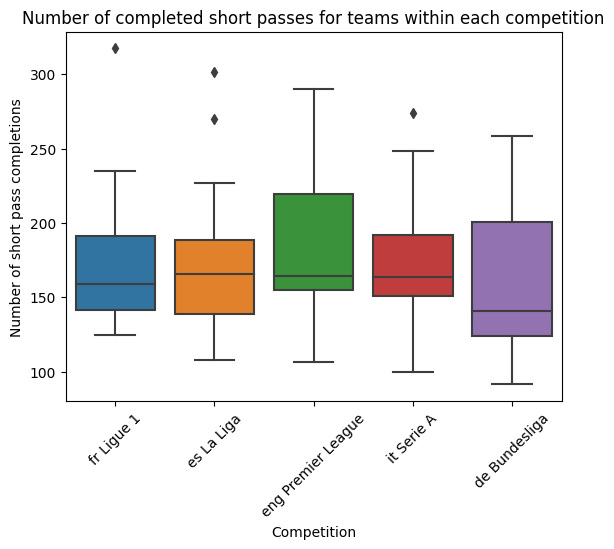

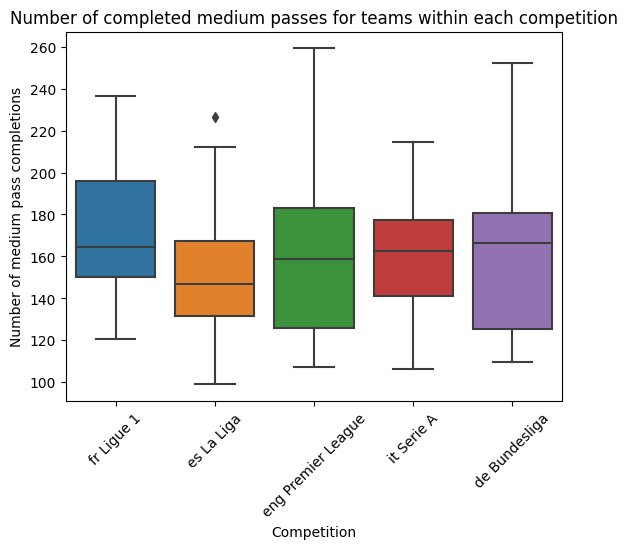

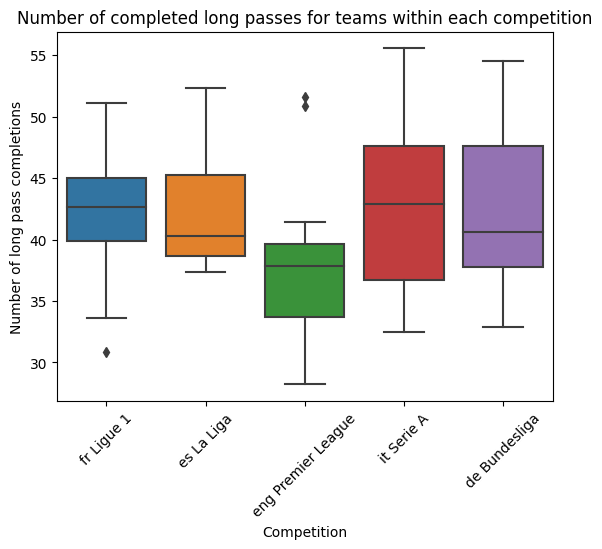

In [25]:
import matplotlib.pyplot as plt

sns.boxplot(data=top5_pass, x='Competition', y='Cmp_short')

plt.title('Number of completed short passes for teams within each competition')
plt.xlabel('Competition')
plt.ylabel('Number of short pass completions')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

sns.boxplot(data=top5_pass, x='Competition', y='Cmp_med')

plt.title('Number of completed medium passes for teams within each competition')
plt.xlabel('Competition')
plt.ylabel('Number of medium pass completions')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


sns.boxplot(data=top5_pass, x='Competition', y='Cmp_long')

plt.title('Number of completed long passes for teams within each competition')
plt.xlabel('Competition')
plt.ylabel('Number of long pass completions')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()



Short passes: fewest in bundesliga, most in la liga and premier league

Medium passes: fewest in la liga, most in ligue 1 and bundesliga

long passes: By far the least in premier league and most in serie A and ligue 1

In terms of pass completions the prem is much more focused on short passing while it appears that ligue 1 in the most direct followed by the serie A.

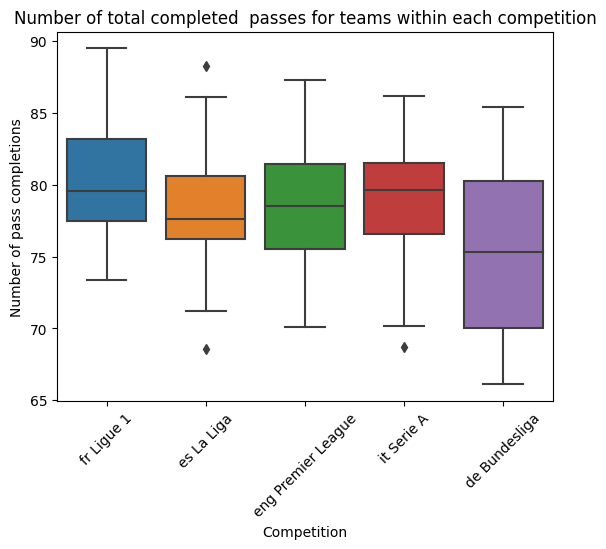

In [26]:
sns.boxplot(data=top5_pass, x='Competition', y='Cmp%_total')

plt.title('Number of total completed  passes for teams within each competition')
plt.xlabel('Competition')
plt.ylabel('Number of pass completions')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


Interestingly, ligue 1 and the Serie A have the highest median passes completed. I would have thought it would be the premier league given the quality of the players in the prem and the amount of short passes. The Bundesliga  has the lowest amount of completions which is surprising given the relatively low amount of long passes played.

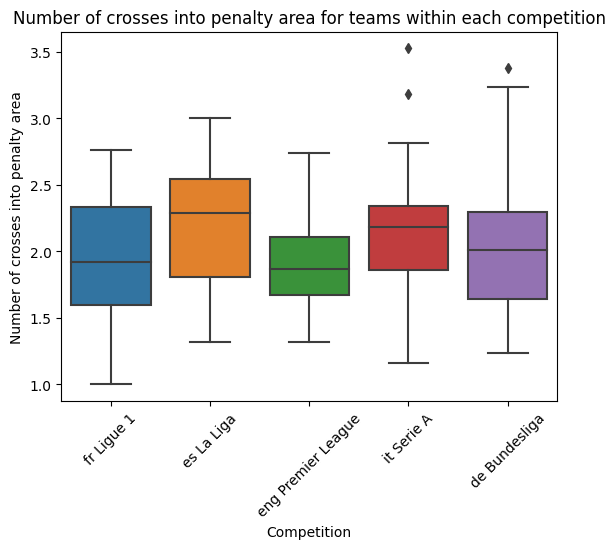

In [29]:
sns.boxplot(data=top5_pass, x='Competition', y='Crs_PA')

plt.title('Number of crosses into penalty area for teams within each competition')
plt.xlabel('Competition')
plt.ylabel('Number of crosses into penalty area')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


La Liga is the most cross heavy league with the median at about 2.4 crosses into the penalty area per game while the premier league sits in last with around 1.8.

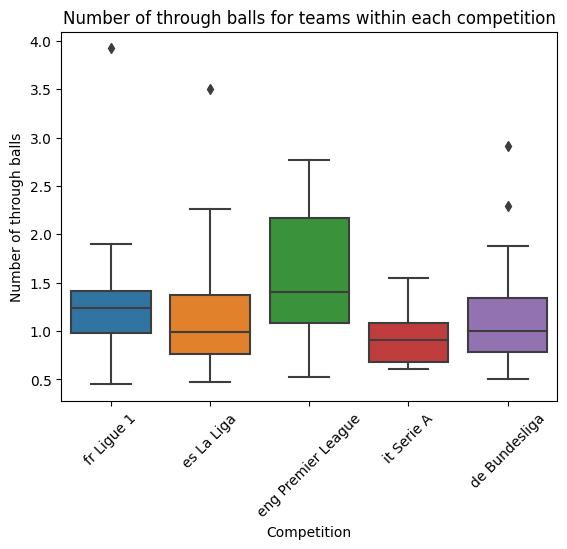

In [31]:
sns.boxplot(data=top5_pass, x='Competition', y='TB')

plt.title('Number of through balls for teams within each competition')
plt.xlabel('Competition')
plt.ylabel('Number of through balls')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


We can see that the most through balls are played in the premier league when looking at the median for each competition. However, there are a couple outliers in every other league: these are the strongest teams in these competitions such as PSG, Barcelona, RB Leipzig, and Bayern.